<a href="https://colab.research.google.com/github/cinthyaa19/07-2241720051-Pemrograman-Mobile/blob/main/07_Cinthya_Achwatul_Ifnu_Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MODUL 9 – Morfologi**




Import Library

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png)

Mounted at /content/drive


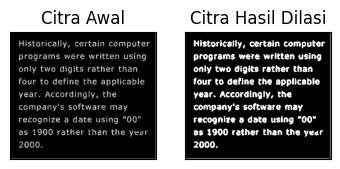

In [18]:
from google.colab import drive
drive.mount('/content/drive')

# Fungsi dilasi
def dilasi_citra(F, w):
    # Ukuran gambar
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)

    # Generate Structuring Element Dilasi (SED) berbentuk cross
    SED = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], dtype=np.uint8)
    constant1 = (w - 1) // 2

    # Proses Dilasi
    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            # Mengambil bagian gambar sesuai SED
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)
    return imgD

# Load the image (sesuaikan image_path)
image_path = '/content/drive/MyDrive/Colab Notebooks/Images/morphology.png'
img = Image.open(image_path)

# Konversi ke grayscale jika gambar masih dalam RGB
if img.mode != 'L':
    img = img.convert('L')

# Konversi gambar PIL ke NumPy array
img_d = np.array(img)

# Melakukan thresholding
ret, thresh = cv2.threshold(img_d, 125, 255, cv2.THRESH_BINARY)

# Ukuran SED 3x3
w = 3
imgD = dilasi_citra(thresh, w)

# Menampilkan gambar
plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()


4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png, dan cetak Structuring Element-nya)

Structuring Element (SED):
 [[0 1 0]
 [1 1 1]
 [0 1 0]]


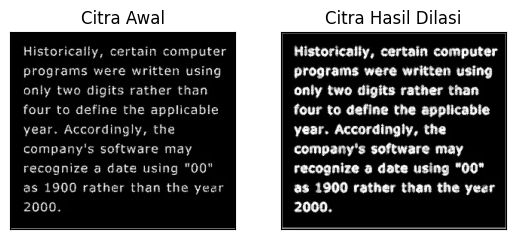

In [19]:
# Path gambar
image_path = '/content/drive/MyDrive/Colab Notebooks/Images/morphology.png'

# Load gambar dalam grayscale
img = cv2.imread(image_path, 0)

# Periksa apakah gambar berhasil dimuat
if img is None:
    print("Gambar tidak ditemukan. Pastikan path benar.")
else:
    # Membuat Structuring Element berbentuk cross 3x3
    SED = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    print("Structuring Element (SED):\n", SED)

    # Operasi dilasi
    img_dilated = cv2.dilate(img, SED)

    # Menampilkan hasil
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Citra Awal')
    plt.xticks([]), plt.yticks([])

    plt.subplot(1, 2, 2)
    plt.imshow(img_dilated, cmap='gray')
    plt.title('Citra Hasil Dilasi')
    plt.xticks([]), plt.yticks([])

    plt.show()


5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)


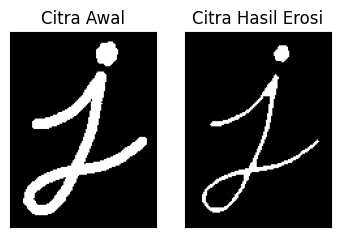

In [22]:
# Fungsi erosi
def erosi_citra(F, w):
    # Ukuran gambar
    p, q = F.shape
    imgE = np.zeros((p, q), dtype=np.uint8)

    # Structuring Element (SE) berbentuk square 5x5
    SE = np.ones((w, w), dtype=np.uint8)
    constant1 = (w - 1) // 2

    # Proses Erosi
    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            # Mengambil area yang sesuai dengan ukuran SE
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            # Jika semua nilai dalam area tersebut sesuai SE (255), maka set pixel sebagai putih (255)
            if np.min(temp * SE) == 255:
                imgE[i, j] = 255
            else:
                imgE[i, j] = 0
    return imgE

# Load gambar
image_path = '/content/drive/MyDrive/Colab Notebooks/Images/j.png'
img = Image.open(image_path)

# Konversi ke grayscale jika gambar dalam RGB
if img.mode != 'L':
    img = img.convert('L')

# Konversi gambar PIL ke NumPy array
img_d = np.array(img)

# Melakukan thresholding
ret, thresh = cv2.threshold(img_d, 125, 255, cv2.THRESH_BINARY)

# Ukuran SE 5x5
w = 5
imgE = erosi_citra(thresh, w)

# Menampilkan gambar
plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()


6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

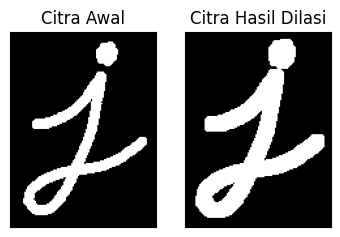

In [23]:
# Load gambar dalam format grayscale
image_path = '/content/drive/MyDrive/Colab Notebooks/Images/j.png'
img = cv2.imread(image_path, 0)

# Melakukan thresholding untuk mengonversi gambar menjadi biner
_, thresh = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY)

# Membuat Structuring Element berbentuk square 5x5
SE = np.ones((5, 5), np.uint8)

# Operasi Dilasi
img_dilated = cv2.dilate(thresh, SE)

# Menampilkan gambar
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_dilated, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()


7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

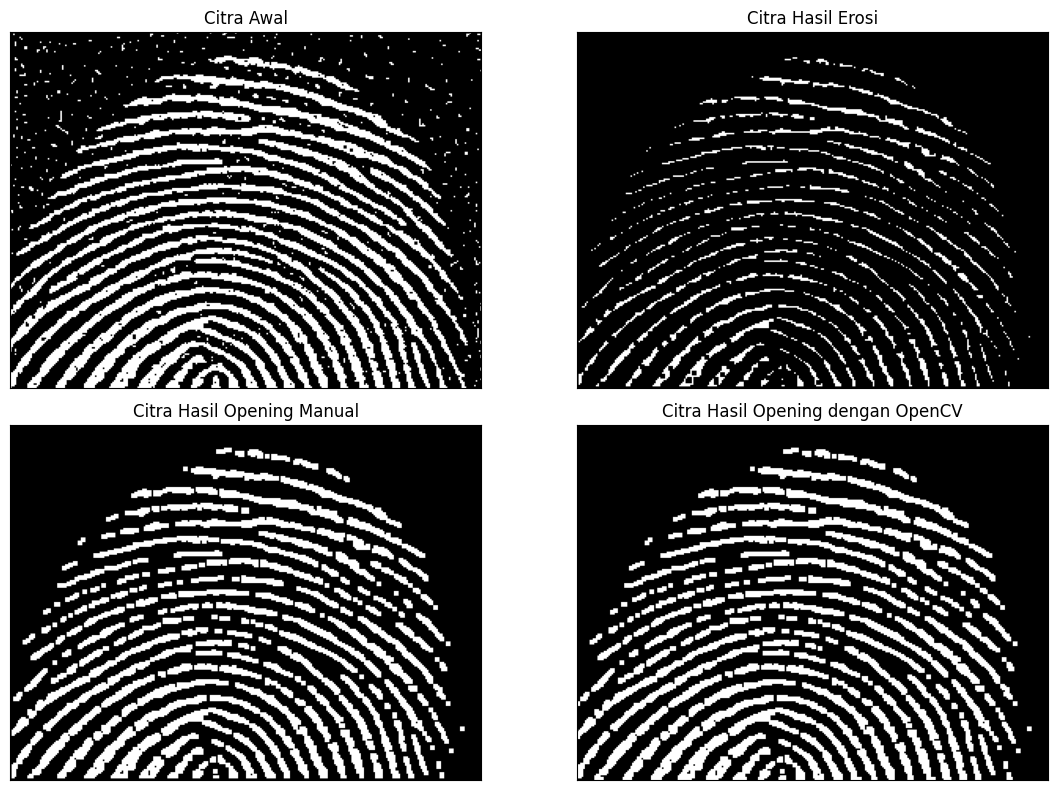

In [25]:
# Fungsi erosi manual
def erosi_citra(F, w):
    p, q = F.shape
    imgE = np.zeros((p, q), dtype=np.uint8)
    SE = np.ones((w, w), dtype=np.uint8)  # Structuring Element (3x3)
    constant = (w - 1) // 2

    for i in range(constant, p - constant):
        for j in range(constant, q - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            if np.min(temp * SE) == 255:
                imgE[i, j] = 255
            else:
                imgE[i, j] = 0
    return imgE

# Fungsi dilasi manual
def dilasi_citra(F, w):
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)
    SE = np.ones((w, w), dtype=np.uint8)  # Structuring Element (3x3)
    constant = (w - 1) // 2

    for i in range(constant, p - constant):
        for j in range(constant, q - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            imgD[i, j] = np.max(temp * SE)
    return imgD

# Fungsi opening tanpa library morphology
def opening_manual(F, w):
    img_eroded = erosi_citra(F, w)
    img_opened = dilasi_citra(img_eroded, w)
    return img_opened

# Load gambar
image_path = '/content/drive/MyDrive/Colab Notebooks/Images/fingerprint.png'
img = Image.open(image_path).convert('L')  # Konversi ke grayscale
img_d = np.array(img)

# Thresholding untuk membuat gambar biner
_, thresh = cv2.threshold(img_d, 125, 255, cv2.THRESH_BINARY)

# Ukuran Structuring Element 3x3
w = 3

# Melakukan operasi erosi dan opening
img_eroded = erosi_citra(thresh, w)
img_opening_manual = opening_manual(thresh, w)

# Membuat Structuring Element untuk OpenCV
SE = np.ones((3, 3), np.uint8)

# Operasi Opening menggunakan library morphology dari OpenCV
img_opening_cv = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, SE)

# Menampilkan hasil
plt.figure(figsize=(12, 8))
plt.subplot(221), plt.imshow(thresh, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img_eroded, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img_opening_manual, cmap='gray')
plt.title('Citra Hasil Opening Manual'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(img_opening_cv, cmap='gray')
plt.title('Citra Hasil Opening dengan OpenCV'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

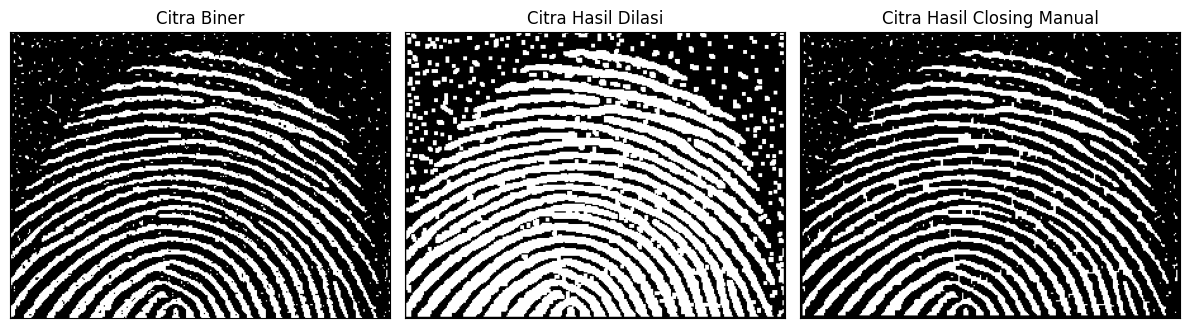

In [27]:
# Fungsi dilasi manual
def dilasi_citra(F, w):
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)
    SE = np.ones((w, w), dtype=np.uint8)  # Structuring Element (3x3)
    constant = (w - 1) // 2

    for i in range(constant, p - constant):
        for j in range(constant, q - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            imgD[i, j] = np.max(temp * SE)
    return imgD

# Fungsi erosi manual
def erosi_citra(F, w):
    p, q = F.shape
    imgE = np.zeros((p, q), dtype=np.uint8)
    SE = np.ones((w, w), dtype=np.uint8)  # Structuring Element (3x3)
    constant = (w - 1) // 2

    for i in range(constant, p - constant):
        for j in range(constant, q - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            if np.min(temp * SE) == 255:
                imgE[i, j] = 255
            else:
                imgE[i, j] = 0
    return imgE

# Fungsi closing tanpa library morphology
def closing_manual(F, w):
    img_dilated = dilasi_citra(F, w)
    img_closed = erosi_citra(img_dilated, w)
    return img_closed

# Load gambar
image_path = '/content/drive/MyDrive/Colab Notebooks/Images/fingerprint.png'
img = Image.open(image_path).convert('L')  # Konversi ke grayscale
img_d = np.array(img)

# Thresholding untuk membuat gambar biner
_, thresh = cv2.threshold(img_d, 125, 255, cv2.THRESH_BINARY)

# Ukuran Structuring Element 3x3
w = 3

# Melakukan operasi dilasi dan closing
img_dilated = dilasi_citra(thresh, w)
img_closing_manual = closing_manual(thresh, w)

# Menampilkan hasil
plt.figure(figsize=(12, 8))
plt.subplot(131), plt.imshow(thresh, cmap='gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_dilated, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_closing_manual, cmap='gray')
plt.title('Citra Hasil Closing Manual'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

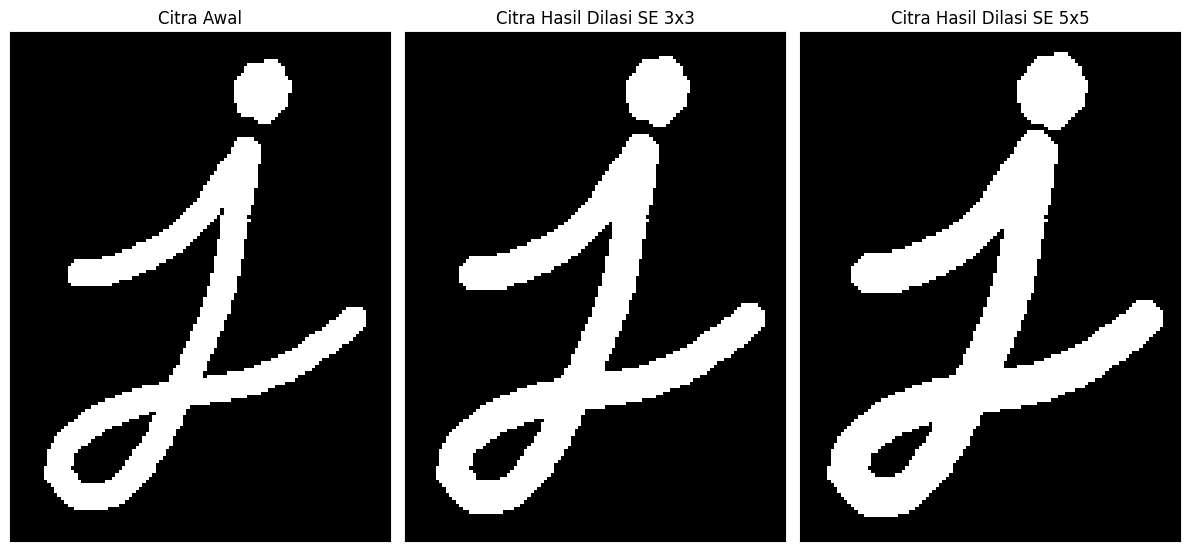

In [29]:
# Fungsi untuk membuat Structuring Element cross
def create_cross_SE(size):
    SE = np.zeros((size, size), dtype=np.uint8)
    center = size // 2
    for i in range(size):
        SE[center, i] = 1  # Baris tengah
        SE[i, center] = 1  # Kolom tengah
    return SE

# Fungsi dilasi manual
def dilasi_citra(F, SE):
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)
    constant = (SE.shape[0] - 1) // 2

    for i in range(constant, p - constant):
        for j in range(constant, q - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            imgD[i, j] = np.max(temp * SE)
    return imgD

# Load gambar
image_path = '/content/drive/MyDrive/Colab Notebooks/Images/j.png'
img = Image.open(image_path).convert('L')  # Konversi ke grayscale
img_d = np.array(img)

# Thresholding untuk membuat gambar biner
_, thresh = cv2.threshold(img_d, 125, 255, cv2.THRESH_BINARY)

# Membuat Structuring Element cross
SE_cross_3x3 = create_cross_SE(3)
SE_cross_5x5 = create_cross_SE(5)

# Melakukan operasi dilasi
img_dilated_3x3 = dilasi_citra(thresh, SE_cross_3x3)
img_dilated_5x5 = dilasi_citra(thresh, SE_cross_5x5)

# Menampilkan hasil
plt.figure(figsize=(12, 8))
plt.subplot(131), plt.imshow(thresh, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_dilated_3x3, cmap='gray')
plt.title('Citra Hasil Dilasi SE 3x3'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_dilated_5x5, cmap='gray')
plt.title('Citra Hasil Dilasi SE 5x5'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

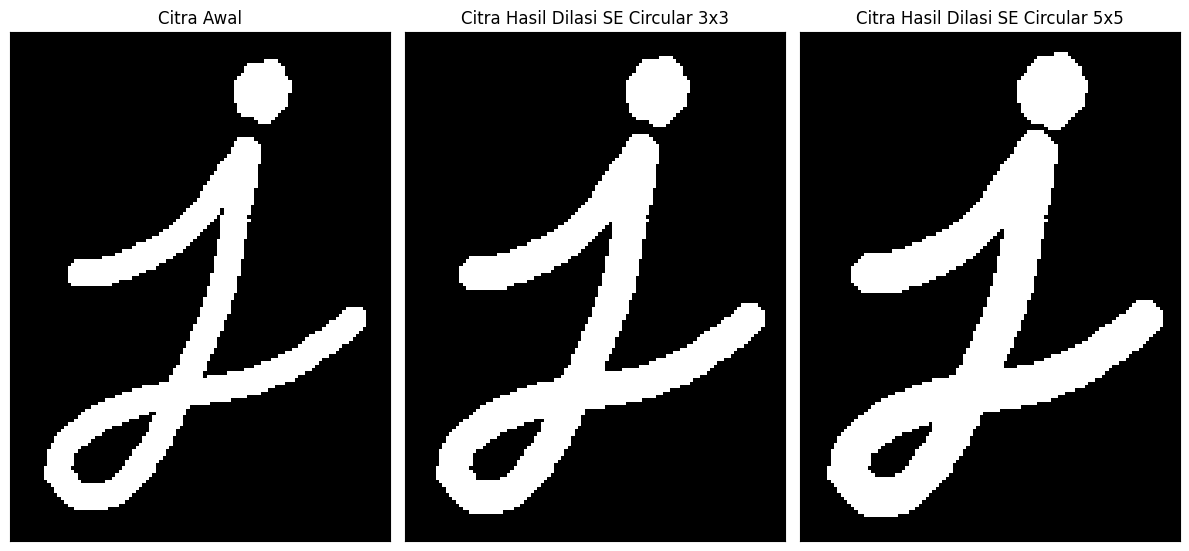

In [30]:
# Fungsi untuk membuat Structuring Element circular
def create_circular_SE(size):
    SE = np.zeros((size, size), dtype=np.uint8)
    radius = size // 2
    for i in range(size):
        for j in range(size):
            if (i - radius) ** 2 + (j - radius) ** 2 <= radius ** 2:
                SE[i, j] = 1
    return SE

# Fungsi dilasi manual
def dilasi_citra(F, SE):
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)
    constant = (SE.shape[0] - 1) // 2

    for i in range(constant, p - constant):
        for j in range(constant, q - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            imgD[i, j] = np.max(temp * SE)
    return imgD

# Load gambar
image_path = '/content/drive/MyDrive/Colab Notebooks/Images/j.png'
img = Image.open(image_path).convert('L')  # Konversi ke grayscale
img_d = np.array(img)

# Thresholding untuk membuat gambar biner
_, thresh = cv2.threshold(img_d, 125, 255, cv2.THRESH_BINARY)

# Membuat Structuring Element circular
SE_circular_3x3 = create_circular_SE(3)
SE_circular_5x5 = create_circular_SE(5)

# Melakukan operasi dilasi
img_dilated_3x3 = dilasi_citra(thresh, SE_circular_3x3)
img_dilated_5x5 = dilasi_citra(thresh, SE_circular_5x5)

# Menampilkan hasil
plt.figure(figsize=(12, 8))
plt.subplot(131), plt.imshow(thresh, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_dilated_3x3, cmap='gray')
plt.title('Citra Hasil Dilasi SE Circular 3x3'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_dilated_5x5, cmap='gray')
plt.title('Citra Hasil Dilasi SE Circular 5x5'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)


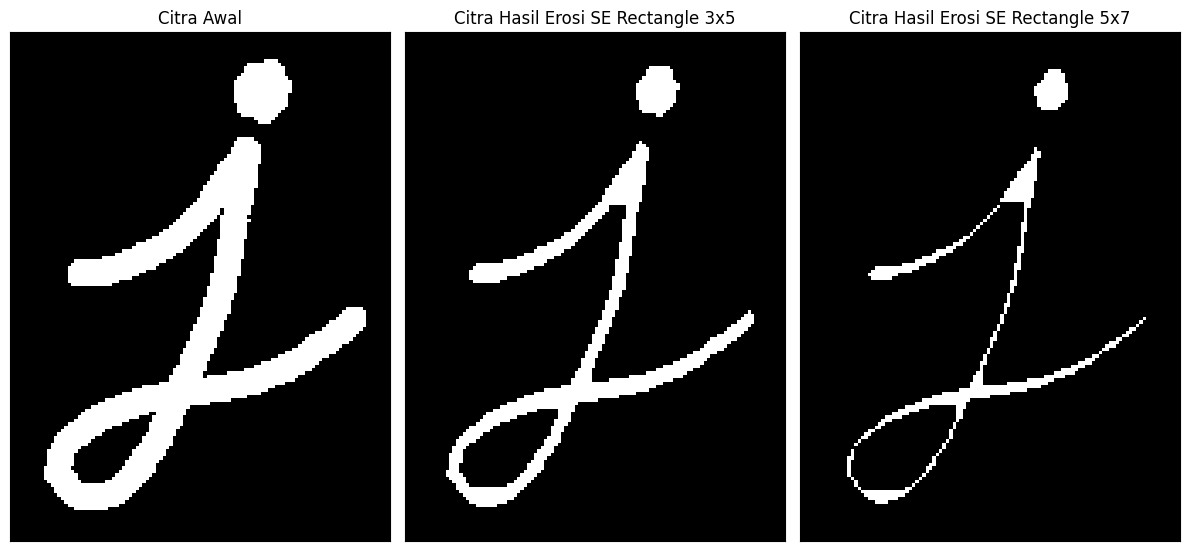

In [31]:
# Fungsi untuk membuat Structuring Element rectangle
def create_rectangle_SE(height, width):
    SE = np.ones((height, width), dtype=np.uint8)
    return SE

# Fungsi erosi manual
def erosi_citra(F, SE):
    p, q = F.shape
    imgE = np.zeros((p, q), dtype=np.uint8)
    h, w = SE.shape
    constant_h = h // 2
    constant_w = w // 2

    for i in range(constant_h, p - constant_h):
        for j in range(constant_w, q - constant_w):
            temp = F[i - constant_h:i + constant_h + 1, j - constant_w:j + constant_w + 1]
            imgE[i, j] = np.min(temp[SE == 1])  # Erosi: ambil nilai minimum

    return imgE

# Load gambar
image_path = '/content/drive/MyDrive/Colab Notebooks/Images/j.png'
img = Image.open(image_path).convert('L')  # Konversi ke grayscale
img_d = np.array(img)

# Thresholding untuk membuat gambar biner
_, thresh = cv2.threshold(img_d, 125, 255, cv2.THRESH_BINARY)

# Membuat Structuring Element rectangle
SE_rectangle_3x5 = create_rectangle_SE(3, 5)
SE_rectangle_5x7 = create_rectangle_SE(5, 7)

# Melakukan operasi erosi
img_eroded_3x5 = erosi_citra(thresh, SE_rectangle_3x5)
img_eroded_5x7 = erosi_citra(thresh, SE_rectangle_5x7)

# Menampilkan hasil
plt.figure(figsize=(12, 8))
plt.subplot(131), plt.imshow(thresh, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_eroded_3x5, cmap='gray')
plt.title('Citra Hasil Erosi SE Rectangle 3x5'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_eroded_5x7, cmap='gray')
plt.title('Citra Hasil Erosi SE Rectangle 5x7'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

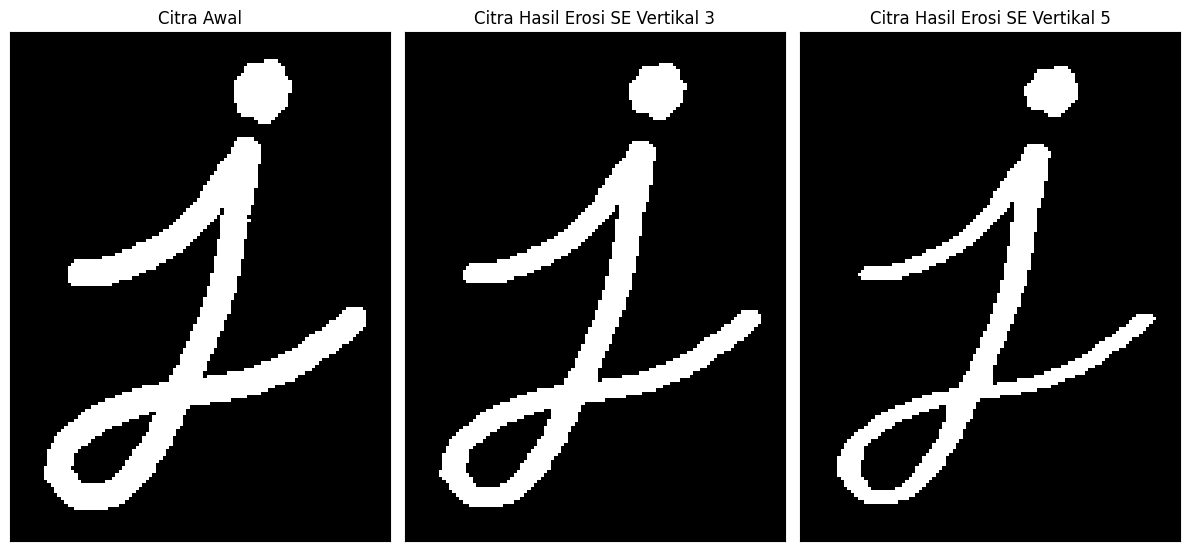

In [33]:
# Fungsi untuk membuat Structuring Element line vertikal
def create_vertical_line_SE(length):
    SE = np.ones((length, 1), dtype=np.uint8)  # Membuat SE line vertikal
    return SE

# Fungsi erosi manual
def erosi_citra(F, SE):
    p, q = F.shape
    imgE = np.zeros((p, q), dtype=np.uint8)
    h = SE.shape[0]
    constant = h // 2

    for i in range(constant, p - constant):
        for j in range(q):
            temp = F[i - constant:i + constant + 1, j]  # Mengambil kolom j
            if np.sum(SE) == h:  # Hanya jika ada elemen di SE
                imgE[i, j] = np.min(temp)  # Erosi: ambil nilai minimum

    return imgE

# Load gambar
image_path = '/content/drive/MyDrive/Colab Notebooks/Images/j.png'
img = Image.open(image_path).convert('L')  # Konversi ke grayscale
img_d = np.array(img)

# Thresholding untuk membuat gambar biner
_, thresh = cv2.threshold(img_d, 125, 255, cv2.THRESH_BINARY)

# Membuat Structuring Element line vertikal
SE_vertical_3 = create_vertical_line_SE(3)
SE_vertical_5 = create_vertical_line_SE(5)

# Melakukan operasi erosi
img_eroded_3 = erosi_citra(thresh, SE_vertical_3)
img_eroded_5 = erosi_citra(thresh, SE_vertical_5)

# Menampilkan hasil
plt.figure(figsize=(12, 8))
plt.subplot(131), plt.imshow(thresh, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_eroded_3, cmap='gray')
plt.title('Citra Hasil Erosi SE Vertikal 3'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_eroded_5, cmap='gray')
plt.title('Citra Hasil Erosi SE Vertikal 5'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


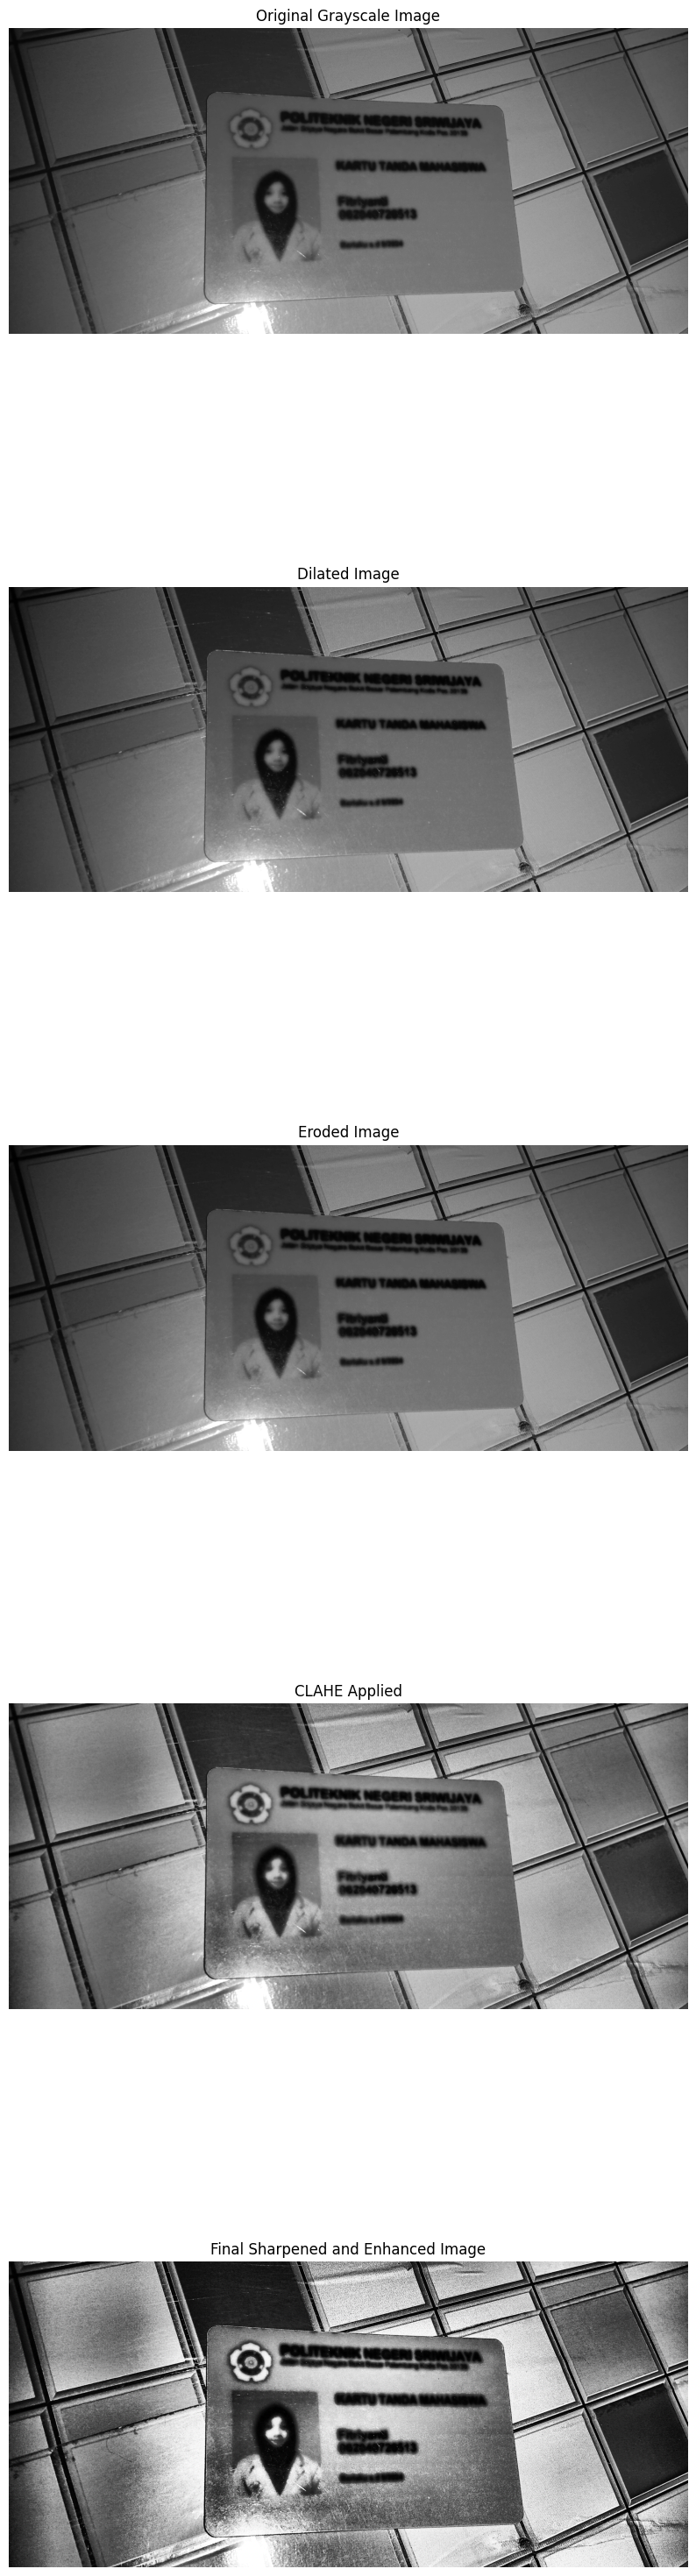

In [39]:
from PIL import Image, ImageFilter, ImageChops, ImageEnhance
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load and convert the image to grayscale
image_path = '/content/drive/MyDrive/Colab Notebooks/Images/ktm_fitri.jpg'
img = Image.open(image_path).convert('L')

# Convert image to numpy array
img_np = np.array(img)

# Morphological operations
kernel = np.ones((3, 3), np.uint8)

# Dilation to enhance bright areas
dilated_img = cv2.dilate(img_np, kernel, iterations=1)
# Erosion to further enhance details
eroded_img = cv2.erode(dilated_img, kernel, iterations=1)

# Apply CLAHE for local contrast enhancement
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(eroded_img)

# Apply Unsharp Mask to further sharpen the details
def unsharp_mask(image, sigma=1.5, strength=2.0):
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    return cv2.addWeighted(image, 1 + strength, blurred, -strength, 0)

sharpened_img = unsharp_mask(clahe_img, sigma=2.0, strength=2.5)

# Final contrast adjustment
final_img = cv2.equalizeHist(sharpened_img)

# Display each step in a vertical arrangement
plt.figure(figsize=(10, 40))

plt.subplot(5, 1, 1)
plt.imshow(img_np, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(5, 1, 2)
plt.imshow(dilated_img, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

plt.subplot(5, 1, 3)
plt.imshow(eroded_img, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

plt.subplot(5, 1, 4)
plt.imshow(clahe_img, cmap='gray')
plt.title('CLAHE Applied')
plt.axis('off')

plt.subplot(5, 1, 5)
plt.imshow(final_img, cmap='gray')
plt.title('Final Sharpened and Enhanced Image')
plt.axis('off')

plt.show()


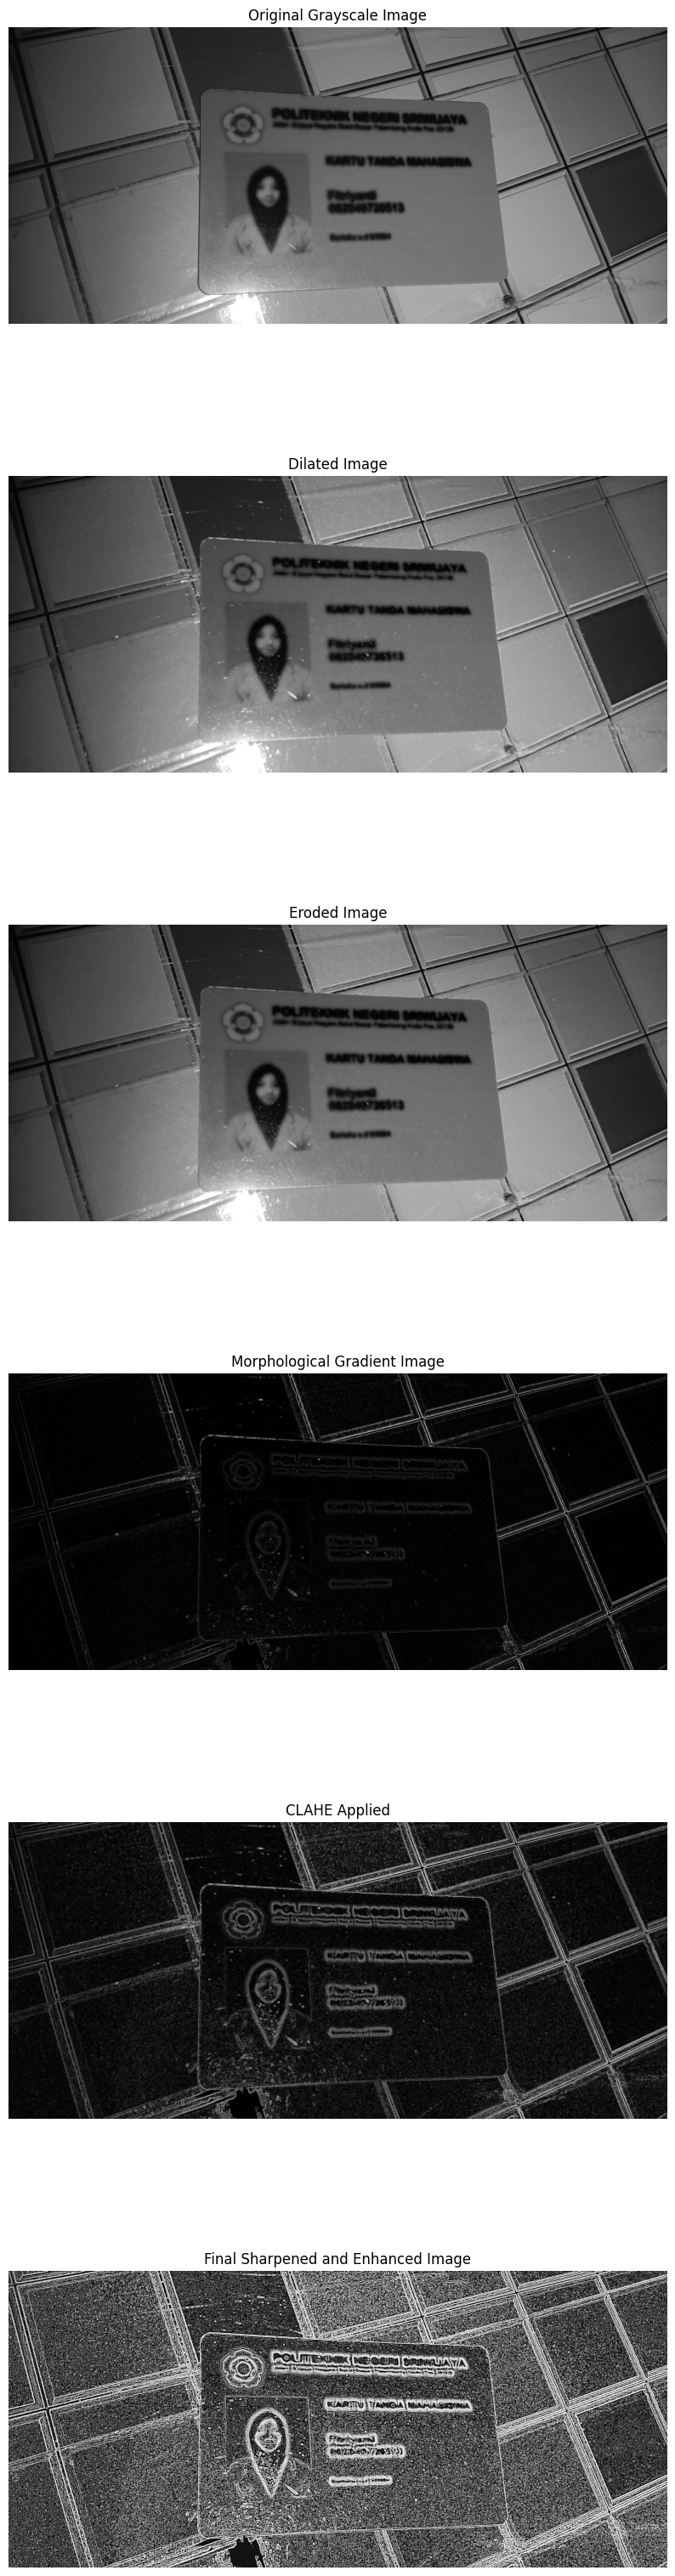

In [42]:
from PIL import Image, ImageFilter, ImageChops, ImageEnhance
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load and convert the image to grayscale
image_path = '/content/drive/MyDrive/Colab Notebooks/Images/ktm_fitri.jpg'
img = Image.open(image_path).convert('L')

# Convert image to numpy array
img_np = np.array(img)

# Morphological operations with larger kernel
kernel = np.ones((5, 5), np.uint8)  # Larger kernel

# Dilation to enhance bright areas
dilated_img = cv2.dilate(img_np, kernel, iterations=2)
# Erosion to further enhance details
eroded_img = cv2.erode(dilated_img, kernel, iterations=1)

# Morphological Gradient to highlight edges
gradient_img = cv2.morphologyEx(eroded_img, cv2.MORPH_GRADIENT, kernel)

# Apply CLAHE for local contrast enhancement
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(gradient_img)

# Apply Unsharp Mask to further sharpen the details
def unsharp_mask(image, sigma=1.5, strength=3.0):  # Increased strength
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    return cv2.addWeighted(image, 1 + strength, blurred, -strength, 0)

sharpened_img = unsharp_mask(clahe_img, sigma=2.5, strength=3.5)

# Final contrast adjustment
final_img = cv2.equalizeHist(sharpened_img)

# Display each step in a vertical arrangement
plt.figure(figsize=(10, 40))

plt.subplot(6, 1, 1)
plt.imshow(img_np, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(6, 1, 2)
plt.imshow(dilated_img, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

plt.subplot(6, 1, 3)
plt.imshow(eroded_img, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

plt.subplot(6, 1, 4)
plt.imshow(gradient_img, cmap='gray')
plt.title('Morphological Gradient Image')
plt.axis('off')

plt.subplot(6, 1, 5)
plt.imshow(clahe_img, cmap='gray')
plt.title('CLAHE Applied')
plt.axis('off')

plt.subplot(6, 1, 6)
plt.imshow(final_img, cmap='gray')
plt.title('Final Sharpened and Enhanced Image')
plt.axis('off')

plt.show()


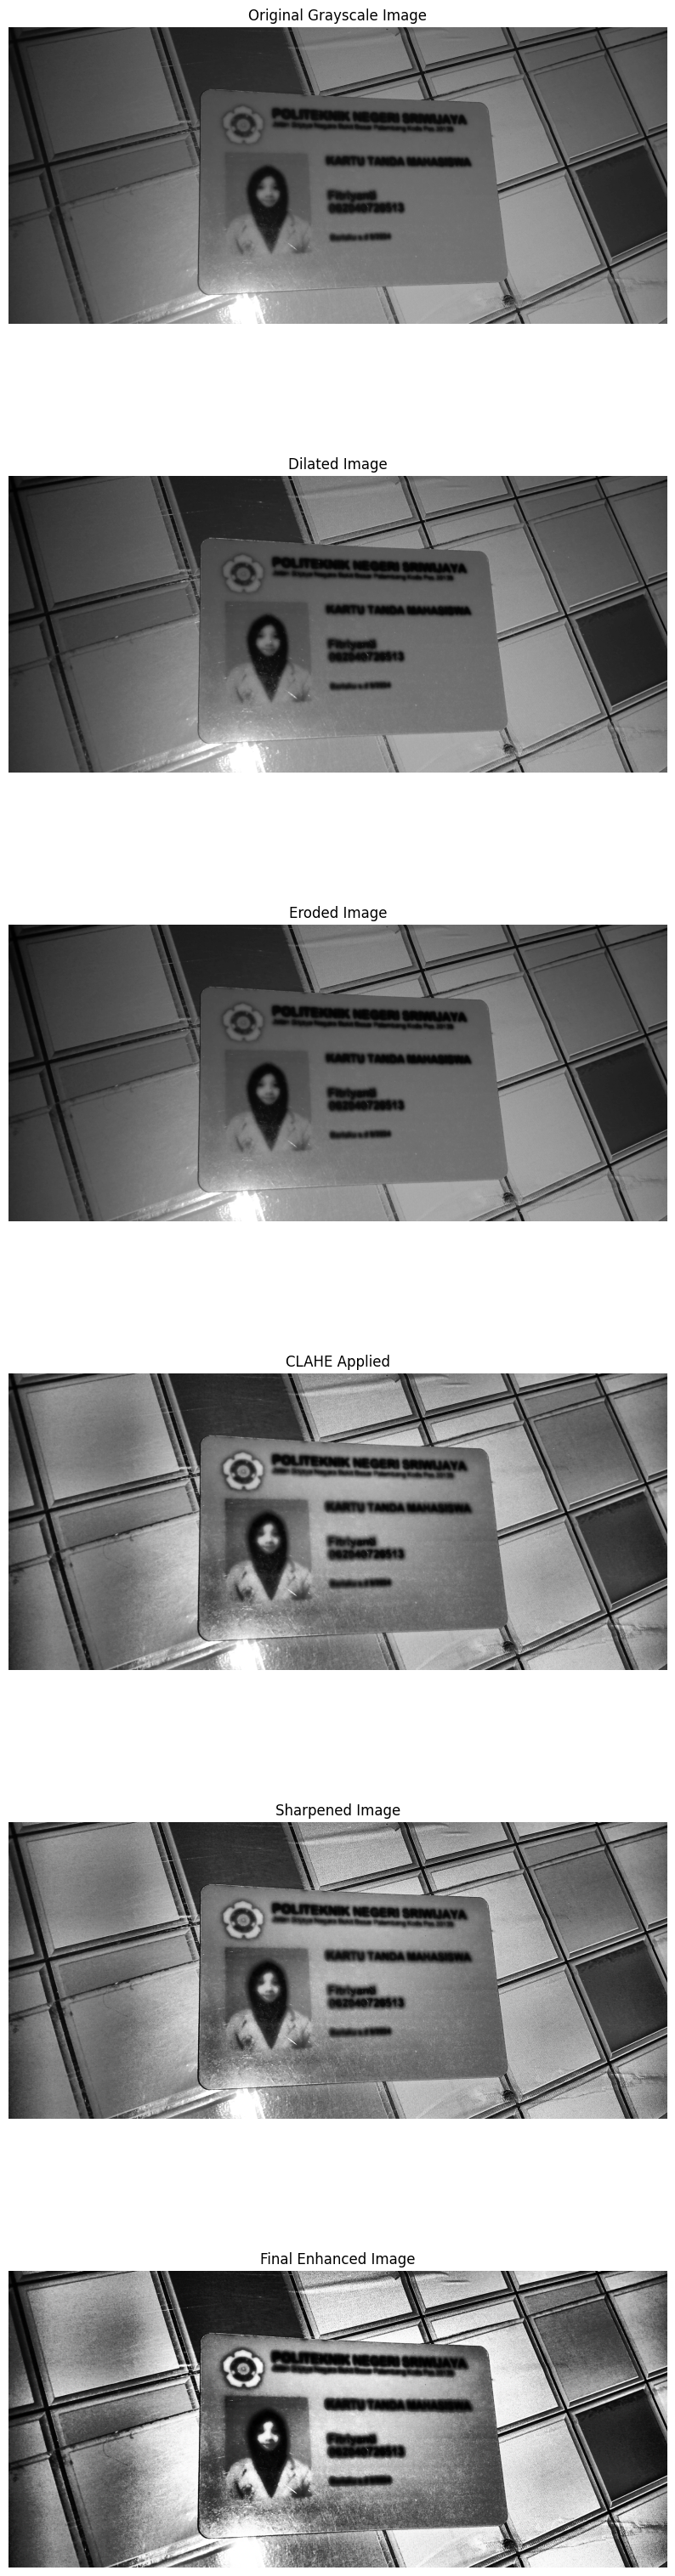

In [43]:
from PIL import Image, ImageFilter, ImageChops, ImageEnhance
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load and convert the image to grayscale
image_path = '/content/drive/MyDrive/Colab Notebooks/Images/ktm_fitri.jpg'
img = Image.open(image_path).convert('L')

# Convert image to numpy array
img_np = np.array(img)

# Morphological operations with reduced iterations
kernel = np.ones((3, 3), np.uint8)  # Smaller kernel

# Dilation to enhance bright areas
dilated_img = cv2.dilate(img_np, kernel, iterations=1)  # Reduced iterations
# Erosion to further enhance details
eroded_img = cv2.erode(dilated_img, kernel, iterations=1)

# Apply CLAHE for local contrast enhancement
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(eroded_img)

# Apply Unsharp Mask to further sharpen the details
def unsharp_mask(image, sigma=1.5, strength=1.5):  # Decreased strength
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    sharpened = cv2.addWeighted(image, 1 + strength, blurred, -strength, 0)
    return sharpened

sharpened_img = unsharp_mask(clahe_img, sigma=2.0, strength=1.5)  # Decreased strength

# Apply light Gaussian Blur to reduce harshness
smooth_img = cv2.GaussianBlur(sharpened_img, (3, 3), 0)

# Final contrast adjustment
final_img = cv2.equalizeHist(smooth_img)

# Display each step in a vertical arrangement
plt.figure(figsize=(10, 40))

plt.subplot(6, 1, 1)
plt.imshow(img_np, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(6, 1, 2)
plt.imshow(dilated_img, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

plt.subplot(6, 1, 3)
plt.imshow(eroded_img, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

plt.subplot(6, 1, 4)
plt.imshow(clahe_img, cmap='gray')
plt.title('CLAHE Applied')
plt.axis('off')

plt.subplot(6, 1, 5)
plt.imshow(sharpened_img, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.subplot(6, 1, 6)
plt.imshow(final_img, cmap='gray')
plt.title('Final Enhanced Image')
plt.axis('off')

plt.show()
